In [1]:
import models
import matplotlib.pyplot as plt

In [2]:
def plot_and_test_stationary(
    num_classes,
    num_servers,
    arrival_rates,
    service_rates,
    class_change_rate_matrix,
    max_simulation_time,
    warmup,
    cooldown,
):
    Q = models.build_and_run_simulation(
        num_classes=num_classes,
        num_servers=num_servers,
        arrival_rates=arrival_rates,
        service_rates=service_rates,
        class_change_rate_matrix=class_change_rate_matrix,
        max_simulation_time=max_simulation_time,
        progress_bar=True,
    )

    p_value = models.adf_test_on_simulation(Q, max_simulation_time, warmup, cooldown)

    ts = [row[0] for row in Q.statetracker.history]
    ns = [sum(row[1][0]) for row in Q.statetracker.history]
    fig, ax = plt.subplots(1)
    ax.plot(ts, ns, c="black")
    ax.set_xlabel("Time", fontsize=14)
    ax.set_ylabel("Number of Customers", fontsize=14)
    ax.set_ylim(bottom=0)
    ymin, ymax = ax.get_ylim()
    ax.vlines(
        [warmup, max_simulation_time - cooldown],
        ymin,
        ymax,
        linestyle="dotted",
        color="grey",
    )
    return fig, p_value

100%|████████████████████████████████████| 400.0/400 [00:00<00:00, 4727.35it/s]


0.0003982984078649209


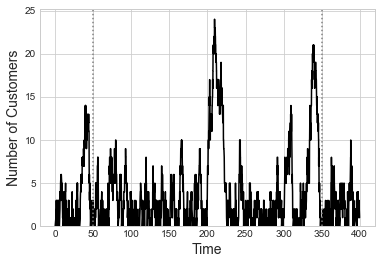

In [3]:
f, pvalue = plot_and_test_stationary(
    num_classes=2,
    num_servers=1,
    arrival_rates=[2, 1],
    service_rates=[4, 4],
    class_change_rate_matrix=[[None, 1], [1, None]],
    max_simulation_time=400,
    warmup=50,
    cooldown=50,
)
f.savefig("../tex/img/adf_test_steadystate.pdf")
print(pvalue)

100%|█████████████████████████████████████| 400.0/400 [00:03<00:00, 129.35it/s]


0.9960557113161541


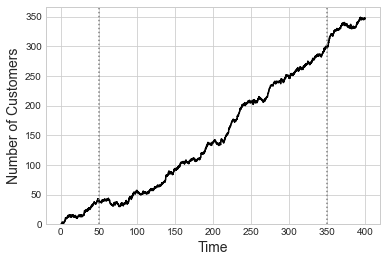

In [4]:
f, pvalue = plot_and_test_stationary(
    num_classes=2,
    num_servers=2,
    arrival_rates=[2, 1],
    service_rates=[1, 1],
    class_change_rate_matrix=[[None, 1], [1, None]],
    max_simulation_time=400,
    warmup=50,
    cooldown=50,
)
f.savefig("../tex/img/adf_test_not_steadystate.pdf")
print(pvalue)